In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten
import tensorflow_hub as hub

# URL dari feature extractor layer
feature_extractor_url_kategori = 'https://tfhub.dev/google/efficientnet/b7/feature-vector/1'
feature_extractor_layer_kategori = hub.KerasLayer(feature_extractor_url_kategori, input_shape=[224, 224, 3], trainable=False)

# Definisikan ulang arsitektur model sesuai dengan output shape yang benar
model_kategori = Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    Lambda(lambda x: feature_extractor_layer_kategori(x)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.25),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(3, activation="softmax")
])

# Memuat bobot model
model_kategori.load_weights('Model-kategori.h5')

model_kategori.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2560)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,443,331 (5.51 MB)

 Trainable params: 1,443,331 (5.51 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Memuat ulang feature extractor layer dengan benar
feature_extractor_url_color = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
feature_extractor_layer_color = hub.KerasLayer(feature_extractor_url_color, input_shape=[224, 224, 3], trainable=False)

# Definisikan ulang arsitektur model sesuai dengan output shape yang benar
model_color = Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    Lambda(lambda x: feature_extractor_layer_color(x)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.25),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
])

# Memuat bobot model
model_color.load_weights('Model-color.h5')

model_color.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_33 (Lambda)                   │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_33 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,182,986 (4.51 MB)

 Trainable params: 1,182,986 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, Lambda
import tensorflow_hub as hub

# Input layer
input_layer = Input(shape=(224, 224, 3))

# URL dari feature extractor layer untuk Model Warna
feature_extractor_url_color = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
feature_extractor_layer_color = hub.KerasLayer(feature_extractor_url_color, trainable=False)

# URL dari feature extractor layer untuk Model Kategori
feature_extractor_url_kategori = 'https://tfhub.dev/google/efficientnet/b7/feature-vector/1'
feature_extractor_layer_kategori = hub.KerasLayer(feature_extractor_url_kategori, trainable=False)

# Pastikan feature extractor layer terdefinisi sebelum digunakan dalam Lambda
color_features = Lambda(lambda x: feature_extractor_layer_color(x), output_shape=(2048,))(input_layer)
kategori_features = Lambda(lambda x: feature_extractor_layer_kategori(x), output_shape=(2560,))(input_layer)

# Model Warna
x1 = Flatten()(color_features)
x1 = Dense(512, activation="relu")(x1)
x1 = Dropout(0.25)(x1)
x1 = Dense(256, activation="relu")(x1)
x1 = Dropout(0.25)(x1)
output_color = Dense(10, activation="softmax", name="color_output")(x1)

# Model Kategori
x2 = Flatten()(kategori_features)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.25)(x2)
x2 = Dense(256, activation="relu")(x2)
x2 = Dropout(0.25)(x2)
output_kategori = Dense(3, activation="softmax", name="kategori_output")(x2)

# Gabungkan kedua output
model_combined = Model(inputs=input_layer, outputs=[output_color, output_kategori])

model_combined.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_3 (Lambda)         │ (None, 2048)           │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_4 (Lambda)         │ (None, 2560)           │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 2048)           │              0 │ lambda_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 2560)           │              0 │ lambda_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 512)            │      1,049,088 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 512)            │      1,311,232 │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 512)            │              0 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 512)            │              0 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 256)            │        131,328 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 256)            │        131,328 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 256)            │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 256)            │              0 │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ color_output (Dense)      │ (None, 10)             │          2,570 │ dropout_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ kategori_output (Dense)   │ (None, 3)              │            771 │ dropout_9[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,626,317 (10.02 MB)

 Trainable params: 2,626,317 (10.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Menyimpan model gabungan ke file H5
model_combined.save('model_gabungan_with_output_shape.h5')

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, Lambda
import tensorflow_hub as hub
import os
import random
from IPython.display import Image, display

# Definisikan ulang arsitektur model gabungan
def create_combined_model():
    # URL dari feature extractor layer
    feature_extractor_url_kategori = 'https://tfhub.dev/google/efficientnet/b7/feature-vector/1'
    feature_extractor_layer_kategori = hub.KerasLayer(feature_extractor_url_kategori, input_shape=[224, 224, 3], trainable=False)

    feature_extractor_url_color = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
    feature_extractor_layer_color = hub.KerasLayer(feature_extractor_url_color, input_shape=[224, 224, 3], trainable=False)

    # Input layer
    input_layer = Input(shape=(224, 224, 3))

    # Apply feature extractor layers using Lambda layer
    color_features = Lambda(lambda x: feature_extractor_layer_color(x))(input_layer)
    kategori_features = Lambda(lambda x: feature_extractor_layer_kategori(x))(input_layer)

    # Model Warna
    x1 = Flatten()(color_features)
    x1 = Dense(512, activation="relu")(x1)
    x1 = Dropout(0.25)(x1)
    x1 = Dense(256, activation="relu")(x1)
    x1 = Dropout(0.25)(x1)
    output_color = Dense(10, activation="softmax", name="color_output")(x1)

    # Model Kategori
    x2 = Flatten()(kategori_features)
    x2 = Dense(512, activation="relu")(x2)
    x2 = Dropout(0.25)(x2)
    x2 = Dense(256, activation="relu")(x2)
    x2 = Dropout(0.25)(x2)
    output_kategori = Dense(3, activation="softmax", name="kategori_output")(x2)
    # Gabungkan kedua output
    model_combined = tf.keras.models.Model(inputs=input_layer, outputs=[output_color, output_kategori])
    return model_combined


In [14]:
# Fungsi untuk memuat model dan melakukan prediksi
def load_model_and_predict(img_path):
    # Buat model gabungan dan load bobot
    model_combined = create_combined_model()
    model_combined.load_weights('/content/model_gabungan_with_output_shape.h5')  # Path yang benar

    # Compile model secara manual
    model_combined.compile(optimizer='adam', loss=['categorical_crossentropy', 'categorical_crossentropy'], metrics=['accuracy'])

    # Muat dan preprocess gambar
    img = image.load_img(img_path, target_size=(224, 224))
    input_data = image.img_to_array(img)
    input_data = np.expand_dims(input_data, axis=0)
    input_data = input_data / 255.0  # Normalisasi gambar

    # Prediksi menggunakan model gabungan
    pred_color, pred_kategori = model_combined.predict(input_data)

    color_index = np.argmax(pred_color)
    kategori_index = np.argmax(pred_kategori)

    return color_index, kategori_index

In [33]:
# Daftar label untuk model warna dan kategori
color_labels = ['Red', 'Blue', 'Green', 'Black', 'White', 'Yellow',  'Pink', 'Purple','Brown', 'Orange']
kategori_labels = ['Footwear','Bottom','Top' ]

# Prediksi gambar
img_path = '/content/34.jpg'
color_index, kategori_index = load_model_and_predict(img_path)
color_label = color_labels[color_index]
kategori_label = kategori_labels[kategori_index]

print(f'Hasil prediksi - Warna: {color_label}, Jenis: {kategori_label}')

recommendations = {
    'top': {
        'black': ('grey', 'beige'),
        'blue': ('beige', 'brown'),
        'brown': ('grey', 'cream'),
        'green': ('brown', 'navy'),
        'orange': ('beige', 'navy'),
        'pink': ('grey', 'beige'),
        'purple': ('black', 'grey'),
        'red': ('black', 'beige'),
        'white': ('black', 'grey'),
        'yellow': ('beige', 'brown')
    },
    'bottom': {
        'black': ('grey', 'white'),
        'blue': ('beige', 'brown'),
        'brown': ('cream', 'grey'),
        'green': ('brown', 'navy'),
        'orange': ('navy', 'beige'),
        'pink': ('grey', 'beige'),
        'purple': ('black', 'grey'),
        'red': ('black', 'beige'),
        'white': ('black', 'grey'),
        'yellow': ('beige', 'brown')
    },
    'footwear': {
        'black': ('grey', 'white'),
        'blue': ('beige', 'brown'),
        'brown': ('cream', 'beige'),
        'green': ('brown', 'navy'),
        'orange': ('navy', 'beige'),
        'pink': ('grey', 'beige'),
        'purple': ('black', 'grey'),
        'red': ('black', 'beige'),
        'white': ('black', 'grey'),
        'yellow': ('beige', 'brown')
    }
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Hasil prediksi - Warna: Red, Jenis: Top


Checking path: /content/drive/My Drive/dataset/DatasetColor/black/bottomwear
Checking path: /content/drive/My Drive/dataset/DatasetColor/beige/bottomwear
Checking path: /content/drive/My Drive/dataset/DatasetColor/black/footwear
Checking path: /content/drive/My Drive/dataset/DatasetColor/beige/footwear
Rekomendasi untuk - Warna: Red, Jenis: Top

Bottom Recommendations:


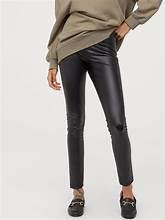

Gambar: /content/drive/My Drive/dataset/DatasetColor/black/bottomwear/th (8).jpeg


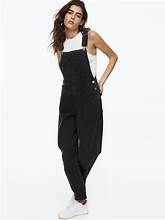

Gambar: /content/drive/My Drive/dataset/DatasetColor/black/bottomwear/th (11).jpeg


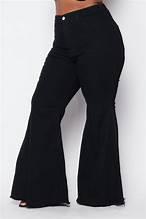

Gambar: /content/drive/My Drive/dataset/DatasetColor/black/bottomwear/th (23).jpeg

Footwear Recommendations:


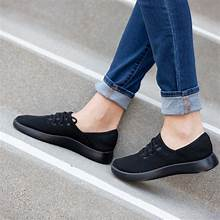

Gambar: /content/drive/My Drive/dataset/DatasetColor/black/footwear/th (24).jpeg


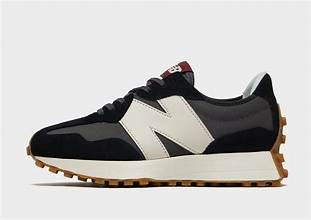

Gambar: /content/drive/My Drive/dataset/DatasetColor/black/footwear/th (2).jpeg


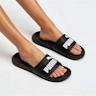

Gambar: /content/drive/My Drive/dataset/DatasetColor/black/footwear/th (33).jpeg


In [34]:
# Fungsi untuk mendapatkan rekomendasi berdasarkan prediksi
def get_recommendations(predicted_category, predicted_color):
    recommended_categories = {
        'Top': ['Bottom', 'Footwear'],
        'Bottom': ['Top', 'Footwear'],
        'Footwear': ['Top', 'Bottom']
    }

    recommendation_images = {}
    for recommended_category in recommended_categories[predicted_category]:

        recommended_colors = recommendations[predicted_category.lower()][predicted_color.lower()]
        images_for_category = []
        for recommended_color in recommended_colors:
            category_folder = recommended_category.lower() + 'wear'

            if recommended_category == 'Footwear':
                category_folder = 'footwear'
            path = os.path.join(dataset_path, recommended_color, category_folder)
            print(f"Checking path: {path}")
            if os.path.exists(path):
                images = os.listdir(path)
                images_for_category.extend([os.path.join(path, img) for img in random.sample(images, min(len(images), 3))])  # Ambil maksimal 3 gambar secara acak
        recommendation_images[recommended_category] = images_for_category

    return recommendation_images

# Dapatkan rekomendasi
dataset_path = '/content/drive/My Drive/dataset/DatasetColor'
recommended_images = get_recommendations(kategori_label, color_label)

# Tampilkan label jenis rekomendasi dan gambar rekomendasi
print(f'Rekomendasi untuk - Warna: {color_label}, Jenis: {kategori_label}')
for category, images in recommended_images.items():
    print(f"\n{category.capitalize()} Recommendations:")
    if not images:
        print(f"Tidak ada gambar ditemukan untuk kategori {category}")
    for img_path in images:
        display(Image(filename=img_path))
        print(f"Gambar: {img_path}")


In [36]:
import tensorflow as tf

# Simpan keseluruhan model dalam format .keras
model_combined.save('/content/drive/My Drive/dataset/model_combined.keras', save_format='keras')

# Atau, simpan model dalam format .h5
model_combined.save('/content/drive/My Drive/dataset/model_combined.h5')
